# Final Project in COMP 767

This project is an implementation of the paper **Active Object Localization with Deep Reinforcement Learning** (http://slazebni.cs.illinois.edu/publications/iccv15_active.pdf).
This paper goal is do detection on the VOC 2007 dataset. To acheive it it propose an reinforcement leanring algorithm that consider each image of the dataset as an different environement for an agent that as the goal to find the thighest bounding box around object of a specific class. 
The agent uses deep reinforcement leaning to accomplish its goal.

## Imports

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import gym
import math
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from collections import namedtuple
from itertools import count
from PIL import Image

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as T
import torchvision.models as models

import gym_project.envs.object_localization as object_localization
from agent import Agent

## Training

In [5]:
BATCH_SIZE = 32
DISCOUNT_RATE = 0.9
EPS_START = 0.9
EPS_END = 0.05
EPS_DECAY = 2000
TARGET_UPDATE = 10
NB_EPISODE = 100
MEMORY_SIZE = 5000
NB_ACTION_IN_HISTORY = 10

env = object_localization.ProjectEnv(detected_class = 11)
agent = Agent(env, 
              target_update=TARGET_UPDATE, 
              discout_rate=DISCOUNT_RATE,
              eps_start=EPS_START, 
              eps_end=EPS_END, 
              eps_decay=EPS_DECAY,
              batch_size=BATCH_SIZE, 
              memory_size=MEMORY_SIZE, 
              n_past_action_to_remember=NB_ACTION_IN_HISTORY)
lenghts = agent.train(env, NB_EPISODE)
print(lenghts)

Environement initializatione done for class : dog
Agent initialization done
0.032471210118935244
0.13439522150323543
0.0
Episode : 0, len : 18
0.0
Episode : 1, len : 11
0.0
Episode : 2, len : 32
0.08878048780487804
Episode : 3, len : 8
0.0
Episode : 4, len : 13
0.5188487408102612
Episode : 5, len : 50
0.1307900788436268
Episode : 6, len : 3
0.07772640306122448
Episode : 7, len : 13
0.08000283698003476
Episode : 8, len : 31
0.4666247642991829
Episode : 9, len : 3
0.617771653141428
Episode : 10, len : 16
0.38960857780612246
Episode : 11, len : 2
0.19437420986093554
Episode : 12, len : 7
0.5579644685335742
Episode : 13, len : 34
0.6921940651260504
Episode : 14, len : 8
0.045572916666666664
Episode : 15, len : 1
0.49372436933018515
Episode : 16, len : 17
0.5408163265306123
Episode : 17, len : 4
0.44040545263893743
Episode : 18, len : 15
0.03990413421210306
Episode : 19, len : 4
0.44422320927145553
Episode : 20, len : 3
0.2218921032056294
Episode : 21, len : 7
0.46794871794871795
0.19730548

## Testing

0.5949734386857729
Action : reset, Reward : 0


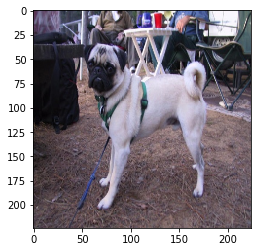

Action : taller, Reward : 1


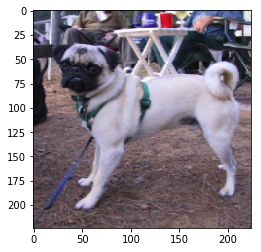

Action : bigger, Reward : -1


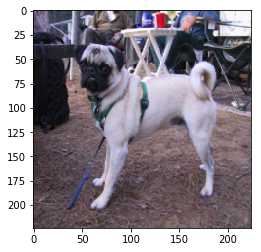

Action : taller, Reward : -1


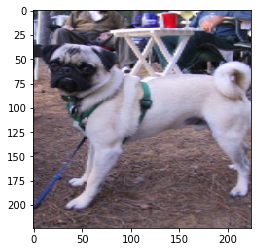

Action : fatter, Reward : -1


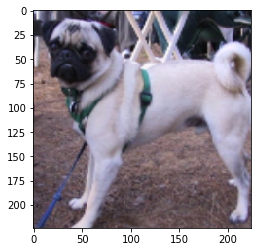

Action : trigger, Reward : 3


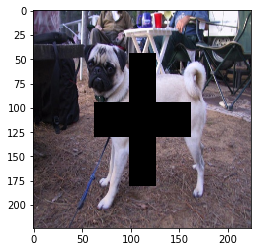

5


In [7]:
imgs, actions, rewards, t = agent.test_episode(env)
for img, action, reward in zip(imgs, actions, rewards):
    print(f"Action : {action}, Reward : {reward}")
    plt.imshow(img)
    plt.show()
print(t)